In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Import of keras model and hidden layers for our convolutional network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


Model trained in two categories fist, and palm. 
Trained on samples cutted from 


In [19]:
batch_size = 16
img_size = (128,128)
NUM_CLASSES = 2

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=45,
    width_shift_range=[-20,20],
    height_shift_range=[-20,20],
    brightness_range=None,
    shear_range=0.0,
    zoom_range=[0.8,1.2],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=[-20,20],
    height_shift_range=[-20,20],
    brightness_range=[0.8,1.2],
    shear_range=0.0,
    zoom_range=[0.8,1.2],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
    directory='../../DATA/data/hands/train/images',
    shuffle=True,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size)
print('Train generator created\n')

valid_generator = valid_datagen.flow_from_directory(
    directory='../../DATA/data/hands/valid/images',
    shuffle=True,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size)
print('Valid generator created\n')


test_generator = test_datagen.flow_from_directory(
    directory = '../../DATA/data/hands/test/images',
    shuffle = True,
    target_size = img_size,
    color_mode='rgb',
    batch_size=batch_size

)
print('Train generator created\n')

Found 465 images belonging to 2 classes.
Train generator created

Found 159 images belonging to 2 classes.
Valid generator created

Found 41 images belonging to 2 classes.
Train generator created



In [20]:
print(next(train_generator)[0].shape)

(16, 128, 128, 3)


In [21]:
model.evaluate(test_generator)

4/4 [==============================] - 5s 1s/step - loss: 2.4188e-05 - accuracy: 1.0000


[2.4188415409298614e-05, 1.0]

In [20]:
model.save('trained_palm_fist.h5')


In [12]:
from tensorflow.keras.applications import EfficientNetB0


def build_model(num_classes):
    model = EfficientNetB0(include_top=False,input_shape=(128,128,3), weights="imagenet")
    inputs = model.input
    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.CategoricalCrossentropy()

    model.compile(
        optimizer=optimizer, loss=loss, metrics=["accuracy"]
    )
    return model

In [13]:

model = build_model(num_classes=NUM_CLASSES)


In [97]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling_16 (Rescaling)        (None, 128, 128, 3)  0           input_23[0][0]                   
__________________________________________________________________________________________________
normalization_16 (Normalization (None, 128, 128, 3)  7           rescaling_16[0][0]               
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 129, 129, 3)  0           normalization_16[0][0]           
_______________________________________________________________________________________

In [14]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


Epoch 1/10
30/30 - 20s - loss: 0.4410 - accuracy: 0.8086 - val_loss: 0.2194 - val_accuracy: 0.9371
Epoch 2/10
30/30 - 11s - loss: 0.1122 - accuracy: 0.9613 - val_loss: 0.1583 - val_accuracy: 0.9560
Epoch 3/10
30/30 - 11s - loss: 0.1228 - accuracy: 0.9613 - val_loss: 0.1278 - val_accuracy: 0.9623
Epoch 4/10
30/30 - 11s - loss: 0.0774 - accuracy: 0.9677 - val_loss: 0.1106 - val_accuracy: 0.9560
Epoch 5/10
30/30 - 11s - loss: 0.0463 - accuracy: 0.9871 - val_loss: 0.0687 - val_accuracy: 0.9874
Epoch 6/10
30/30 - 11s - loss: 0.0290 - accuracy: 0.9935 - val_loss: 0.0501 - val_accuracy: 0.9937
Epoch 7/10
30/30 - 11s - loss: 0.0355 - accuracy: 0.9849 - val_loss: 0.0482 - val_accuracy: 0.9874
Epoch 8/10
30/30 - 11s - loss: 0.0421 - accuracy: 0.9828 - val_loss: 0.0269 - val_accuracy: 0.9937
Epoch 9/10
30/30 - 12s - loss: 0.0503 - accuracy: 0.9828 - val_loss: 0.0218 - val_accuracy: 0.9937
Epoch 10/10
30/30 - 13s - loss: 0.0375 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9937


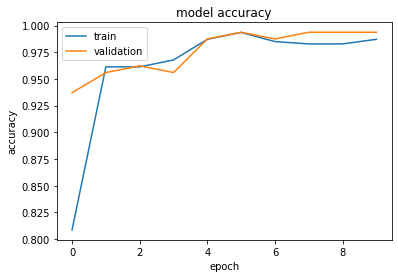

In [21]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size


epochs = 10 
hist = model.fit(train_generator,epochs=epochs,validation_data=valid_generator, verbose=2)
plot_hist(hist)

In [22]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    loss = tf.keras.losses.CategoricalCrossentropy()

    model.compile(
        optimizer=optimizer, loss=loss, metrics=["accuracy"]
    )


unfreeze_model(model)

epochs = 10 
hist = model.fit(train_generator,epochs=epochs,validation_data=valid_generator, verbose=2)

Epoch 1/10
30/30 - 20s - loss: 0.0235 - accuracy: 0.9892 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2/10
30/30 - 13s - loss: 0.0160 - accuracy: 0.9957 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 3/10
30/30 - 12s - loss: 0.0356 - accuracy: 0.9849 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 4/10
30/30 - 12s - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 5/10
30/30 - 12s - loss: 0.0234 - accuracy: 0.9914 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/10
30/30 - 12s - loss: 0.0091 - accuracy: 0.9957 - val_loss: 0.0097 - val_accuracy: 0.9937
Epoch 7/10
30/30 - 12s - loss: 0.0165 - accuracy: 0.9935 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/10
30/30 - 12s - loss: 0.0096 - accuracy: 0.9957 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 9/10
30/30 - 13s - loss: 0.0099 - accuracy: 0.9978 - val_loss: 4.5177e-04 - val_accuracy: 1.0000
Epoch 10/10
30/30 - 12s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 9.7226e-04 - val_accuracy: 1.0000


In [23]:
model.save('trained_EfficientNetB0_palm_fist.h5')


In [24]:
model.evaluate(test_generator)

3/3 [==============================] - 1s 214ms/step - loss: 5.7787e-04 - accuracy: 1.0000


[0.0005778667400591075, 1.0]